In [1]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [2]:
# import like this
items_path = "./datasets/dataset_task_20/items.csv"
q1_path = "./datasets/dataset_task_20/quarter-1.csv"
q2_path = "./datasets/dataset_task_20/quarter-2.csv"
q3_path = "./datasets/dataset_task_20/quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [3]:
# code here
# 1.
combined = pd.concat([q1,q2,q3],ignore_index = True)
combined

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,$3.39
1,1,1,2,2,$3.39
2,2,2,4,3,$16.98
3,4,1,7,6,$9.25
4,6,1,9,8,$8.75
...,...,...,...,...,...
4617,1829,1,23,92,$11.25
4618,1830,1,23,1043,$11.25
4619,1832,1,10,116,$8.75
4620,1832,1,8,0,$4.45


In [4]:
combined['item_price'] = combined['item_price'].str.strip('$')
combined

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,3.39
1,1,1,2,2,3.39
2,2,2,4,3,16.98
3,4,1,7,6,9.25
4,6,1,9,8,8.75
...,...,...,...,...,...
4617,1829,1,23,92,11.25
4618,1830,1,23,1043,11.25
4619,1832,1,10,116,8.75
4620,1832,1,8,0,4.45


In [5]:
#2.
multi_index_dataframe = pd.concat([q1,q2,q3],keys = ['Q-1','Q-2','Q-3'])
multi_index_dataframe
multi_index_dataframe.reset_index(inplace = True)
multi_index_dataframe['item_price'] = multi_index_dataframe['item_price'].str.strip('$')

In [6]:
multi_index_dataframe['item_price'] = pd.to_numeric(multi_index_dataframe['item_price'])

In [7]:
multi_index_dataframe.head(2)

,level_0,level_1,order_id,quantity,item_id,choice_description_id,item_price
0,Q-1,0,1,1,1,1,3.39
1,Q-1,1,1,1,2,2,3.39


In [8]:
pd.merge(items,multi_index_dataframe,on = 'item_id',how='inner').groupby(['level_0'])['quantity'].max()


level_0
Q-1    15
Q-2     8
Name: quantity, dtype: int64

In [9]:
#3
pd.merge(items,multi_index_dataframe,on = 'item_id',how='inner').groupby(['level_0','item_name'])['item_price'].sum().reset_index().sort_values('item_price',ascending = False).drop_duplicates(subset = ['level_0'],keep= 'first')

,level_0,item_name,item_price
65,Q-2,Chicken Bowl,3817.01
17,Q-1,Chicken Bowl,3525.72


In [10]:
# q4
def calculate_revenue(group):
    group['revenue'] = group['item_price'].sum()*group['quantity'].sum()
    return group
new = pd.merge(items,multi_index_dataframe,on = 'item_id',how='inner').groupby(['level_0','item_name'])
new1 = new.apply(calculate_revenue)
new1.groupby(['level_0','item_name'])['revenue'].max().reset_index().sort_values('revenue',ascending = False).head(2)

,level_0,item_name,revenue
65,Q-2,Chicken Bowl,1503901.94
17,Q-1,Chicken Bowl,1293939.24


In [11]:
#q5
new = pd.merge(items,multi_index_dataframe,on = 'item_id',how='inner').groupby(['level_0'])['item_price'].mean().reset_index()
new

,level_0,item_price
0,Q-1,7.577138
1,Q-2,7.354994


###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [12]:
ipl_match = pd.read_csv('./datasets/dataset_task_20/IPL_Matches_2008_2022.csv')
ipl_ball = pd.read_csv('./datasets/dataset_task_20/IPL_Ball_by_Ball_2008_2022.csv')

In [13]:
ipl_match.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [14]:
ipl_ball.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [15]:
ipl_ball['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [16]:
ipl_ball['isBowlerWicket']= ipl_ball.kind.apply(lambda z:1 if z in ('caught','caught and bowled','bowled','stumped','lbw') else 0) 
ipl_ball['Bowler_runs'] = ipl_ball.extra_type.apply(lambda z:0 if z in ('byes','legbyes') else 1)*ipl_ball['total_run']
ipl_ball['isLegalBall'] = ipl_ball.extra_type.apply(lambda z : 0 if z in ('wides','noballs') else 1)

In [17]:
new = pd.merge(ipl_match[['Season','ID']],ipl_ball,on = 'ID')
new.head(2)

,Season,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,isBowlerWicket,Bowler_runs,isLegalBall
0,2022,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0,0,1
1,2022,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0,0,1


In [18]:
pcapdf= new.groupby(['Season','bowler'])['isBowlerWicket','Bowler_runs','isLegalBall'].sum().reset_index()
pcapdf['Economy'] = pcapdf['Bowler_runs']/pcapdf['isLegalBall']*6 #every 6th ball, how much run he has given
pcapdf.sort_values(['isBowlerWicket','Economy'],ascending = [False,False]).drop_duplicates('Season',keep='first').sort_values('Season',ascending = False)

C:\Users\A5927\AppData\Local\Temp\ipykernel_13576\1731409949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pcapdf= new.groupby(['Season','bowler'])['isBowlerWicket','Bowler_runs','isLegalBall'].sum().reset_index()


,Season,bowler,isBowlerWicket,Bowler_runs,isLegalBall,Economy
1671,2022,YS Chahal,27,527,408,7.750000
1467,2021,HV Patel,32,459,338,8.147929
1381,2020/21,K Rabada,32,549,398,8.276382
1278,2019,K Rabada,26,375,288,7.812500
1144,2018,AJ Tye,24,448,336,8.000000
1048,2017,B Kumar,26,369,314,7.050955
938,2016,B Kumar,23,490,396,7.424242
847,2015,DJ Bravo,26,426,314,8.140127
779,2014,MM Sharma,23,452,323,8.396285
629,2013,DJ Bravo,32,497,375,7.952000


Q-7: Best bowler in death overs.
Note: Have taken most no of wickets in case of tie with least economy

Death Overs - [16-20]

In [20]:
#Code here
overdf = new[new['overs']>15]
overdf.head(2)

,Season,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,isBowlerWicket,Bowler_runs,isLegalBall
96,2022,1312200,1,16,1,R Parag,LH Ferguson,TA Boult,NaN,1,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0,1,1
97,2022,1312200,1,16,2,TA Boult,LH Ferguson,R Parag,NaN,1,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0,1,1


In [23]:
ques7df = pd.merge(ipl_match[['Season','ID']],overdf,on = 'ID')
ques7df.head(2)

,Season_x,ID,Season_y,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,isBowlerWicket,Bowler_runs,isLegalBall
0,2022,1312200,2022,1,16,1,R Parag,LH Ferguson,TA Boult,NaN,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0,1,1
1,2022,1312200,2022,1,16,2,TA Boult,LH Ferguson,R Parag,NaN,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0,1,1


In [24]:
ques7df['isBowlerWicket']= ques7df.kind.apply(lambda x:1 if x in ('caught','caught and bowled','bowled','stumped','lbw') else 0)
ques7df['isBowlerRuns'] = ques7df.extra_type.apply(lambda x:0 if x in ('byes','legbyes') else 1)*ques7df['total_run']
ques7df['isLegalBall'] = ques7df.extra_type.apply(lambda x:0 if x in ('wides','noballs') else 1)

In [37]:
group = ques7df.groupby(['Season_x','bowler'])['isBowlerWicket','isBowlerRuns','isLegalBall'].sum().reset_index()
group['Economy'] = group['isBowlerRuns']/group['isLegalBall'] *6
group.sort_values(['isBowlerWicket','Economy'],ascending = False).drop_duplicates('Season_x',keep = 'first').sort_values('Season_x',ascending = False)

C:\Users\A5927\AppData\Local\Temp\ipykernel_13576\577143457.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = ques7df.groupby(['Season_x','bowler'])['isBowlerWicket','isBowlerRuns','isLegalBall'].sum().reset_index()


,Season_x,bowler,isBowlerWicket,isBowlerRuns,isLegalBall,Economy
1109,2022,DJ Bravo,11,113,74,9.162162
1043,2021,HV Patel,19,221,140,9.471429
982,2020/21,K Rabada,17,176,118,8.949153
902,2019,K Rabada,17,178,120,8.900000
841,2018,JJ Bumrah,13,157,120,7.850000
771,2017,JD Unadkat,16,150,107,8.411215
677,2016,B Kumar,11,205,126,9.761905
612,2015,DJ Bravo,21,243,170,8.576471
567,2014,MM Sharma,14,208,119,10.487395
458,2013,DJ Bravo,20,216,159,8.150943


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [168]:
ques8df = pd.merge(ipl_match[['Season','ID']],ipl_ball,on = 'ID')
def function_8(batsman_name):
    pass
ques8df['isLegalBalls'] = ques8df.extra_type.apply(lambda x :0 if x == 'wides' else 1)
ques8df['strike_rate'] = (ques8df['batsman_run']/ques8df['isLegalBalls'])*100


In [184]:
group = ques8df.groupby(['Season','batter']).agg(
    {
    'batsman_run':'sum',
    'player_out':'count',
    'isLegalBalls':'sum',
    'innings':'count'
#     'batsman_run':'max'  
    }
)


In [179]:
group

batsman_run  player_out  isLegalBalls  innings
Season  batter                                                           
2007/08 A Chopra                    42           4            52       55
        A Kumble                    13           1            17       17
        A Mishra                    37           4            42       42
        A Mukund                     0           1             1        1
        A Nehra                      3           0            13       13
...                                ...         ...           ...      ...
2022    WP Saha                    317           9           259      266
        Washington Sundar          101           7            69       76
        YBK Jaiswal                258          10           194      198
        YS Chahal                    5           1             8        8
        Yash Dayal                   0           1             1        1

[2269 rows x 4 columns]

In [181]:

group['strike_rate'] = group['batsman_run']/group['isLegalBalls']*100
group['Average'] = group['batsman_run']/group['player_out']
group['Highest_Score'] = group['batsman_run'].max()

In [182]:
group

batsman_run  player_out  isLegalBalls  innings  \
Season  batter                                                              
2007/08 A Chopra                    42           4            52       55   
        A Kumble                    13           1            17       17   
        A Mishra                    37           4            42       42   
        A Mukund                     0           1             1        1   
        A Nehra                      3           0            13       13   
...                                ...         ...           ...      ...   
2022    WP Saha                    317           9           259      266   
        Washington Sundar          101           7            69       76   
        YBK Jaiswal                258          10           194      198   
        YS Chahal                    5           1             8        8   
        Yash Dayal                   0           1             1        1   

                           strike_rate    Average  Highest_Score  
Season  batter                                                    
2007/08 A Chopra             80.769231  10.500000            973  
        A Kumble             76.470588  13.000000            973  
        A Mishra             88.095238   9.250000            973  
        A Mukund              0.000000   0.000000            973  
        A Nehra              23.076923        inf            973  
...                                ...        ...            ...  
2022    WP Saha             122.393822  35.222222            973  
        Washington Sundar   146.376812  14.428571            973  
        YBK Jaiswal         132.989691  25.800000            973  
        YS Chahal            62.500000   5.000000            973  
        Yash Dayal            0.000000   0.000000            973  

[2269 rows x 7 columns]

In [138]:
ipl_ball.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,isBowlerWicket,Bowler_runs,isLegalBall
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0,0,1
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0,0,1


In [180]:
ipl_ball.innings.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [ ]:
# code here


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [ ]:
# code here

## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [40]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

<AxesSubplot:xlabel='type'>

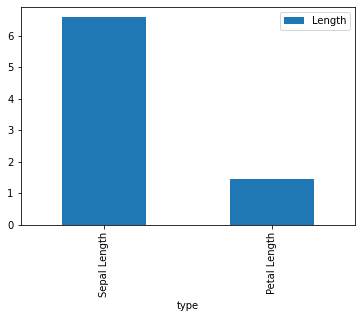

In [54]:
# code here
virginica.head(2)
sepal_all.head(2)
sepal = pd.merge(virginica,sepal_all,on = 'Id')['SepalLengthCm'].mean()
petal_setosa = pd.merge(setosa,petal_all, on = 'Id')['PetalLengthCm'].mean()
pd.DataFrame({"type":['Sepal Length','Petal Length'],"Length":[sepal,petal_setosa]}).plot(x = "type",kind = "bar")

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [56]:
# code here
virginica.head(1)

,Unnamed: 0,Id,Species
0,100,101,Iris-virginica


In [57]:
versicolor.head(1)

,Unnamed: 0,Id,Species
0,50,51,Iris-versicolor


In [58]:
setosa.head(1)

,Unnamed: 0,Id,Species
0,0,1,Iris-setosa


In [59]:
sepal_all.head(1)

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm
0,0,1,5.1,3.5


In [60]:
petal_all.head(1)

,Unnamed: 0,Id,PetalLengthCm,PetalWidthCm
0,0,1,1.4,0.2


In [69]:
combined = pd.concat([virginica,versicolor,setosa],ignore_index = True)
combined.drop(columns = ['Unnamed: 0'],inplace = True)

In [78]:
final = combined.merge(sepal_all[['Id','SepalLengthCm','SepalWidthCm']],on = 'Id').merge(petal_all[['Id','PetalLengthCm','PetalWidthCm']],on = 'Id')
final_shuffle = final.sample(frac = 1)# shuffling of IDs
final.head(2)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,101,Iris-virginica,6.3,3.3,6.0,2.5
1,102,Iris-virginica,5.8,2.7,5.1,1.9


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [134]:
# code here
def min_max(group,types):
    minimum = group[group['Species'] == types]['SepalWidthCm'].min()
    maximum = group[group['Species'] == types]['SepalWidthCm'].max()
    return minimum,maximum
group = final.groupby('Species')
input_flower = input("enter the flower type")
input_string = 'Iris'+'-'+input_flower
print(input_string)
output = group.apply(min_max,input_string)
print(mini[0][0])
print("Minimum Sepal width of %s is" %input_string,output[0][0])
print("Maximum Sepal width of %s is "%input_string, output[0][1])

enter the flower typeversicolor
Iris-versicolor
2.3
Minimum Sepal width of Iris-versicolor is nan
Maximum Sepal width of Iris-versicolor is  nan


Working as a Data Scientist and worked on commercial analytics and forecasting projects, applying advanced statistical modeling and machine learning techniques to forecast workforce sales and optimize resource allocation where I have developed and implemented descriptive and predictive models to set sales goals, correct targets, and maximize workforce utilization, resulting in improved operational efficiency and cost savings for clients.
Also, collaborated closely with cross-functional teams, including clients and stakeholders, to understand business requirements and translate them into actionable data-driven solutions. I have also created interactive field target reports using Power BI, providing insightful visualizations and actionable recommendations to support strategic decision-making and enhance sales performance. 
Apart from this, I have successfully delivered an AI-based solution for predicting physician new drug adoption, utilizing data cleaning, exploration, feature selection, and optimization techniques, resulting in a 77% accuracy and a 73% F1 Score.